In [70]:
import os
import sys
import inspect
import itertools

import numpy as np
from numpy import ma
import pandas as pd
import xarray as xr
from datetime import datetime, timedelta
from dateutil.parser import parse as parse_date

import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import cartopy.crs as ccrs


# code from https://stackoverflow.com/questions/279237/import-a-module-from-a-relative-path?lq=1#comment15918105_6098238 to load a realitive folde from a notebook
# realpath() will make your script run, even if you symlink it :)
cmd_folder = os.path.realpath(os.path.abspath(os.path.split(inspect.getfile( inspect.currentframe() ))[0]))
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)

# from utils import io, abi, glm, nexrad
from utils import io, abi, glm, nexrad
from utils.plotting import goes_figure

In [2]:
import warnings
warnings.filterwarnings(
    action='ignore',
    category=DeprecationWarning
)

/Users/jonesw/opt/anaconda3/envs/flow_dev2/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
goes_data_path = './data/GOES16'

In [4]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/Users/jonesw/Downloads/dcc-detect-4e11a4adbc07.json'

In [5]:
dates = [datetime(2018,6,19,17) + timedelta(hours=i) for i in range(4)]
abi_files = list(sum([sorted(io.find_abi_files(date, satellite=16, product='MCMIP', view='C', mode=3, 
                                        save_dir=goes_data_path, 
                                        replicate_path=True, check_download=True, 
                                        n_attempts=1, download_missing=True))
                  for date in dates],[]))
             

abi_files = {io.get_goes_date(i):i for i in abi_files}
abi_dates = list(abi_files.keys())
len(abi_files)


48

In [6]:
goes_frame = xr.open_dataset(list(abi_files.values())[24])

Text(0.5, 1.0, 'ABI Ch8-Ch10 WVD')

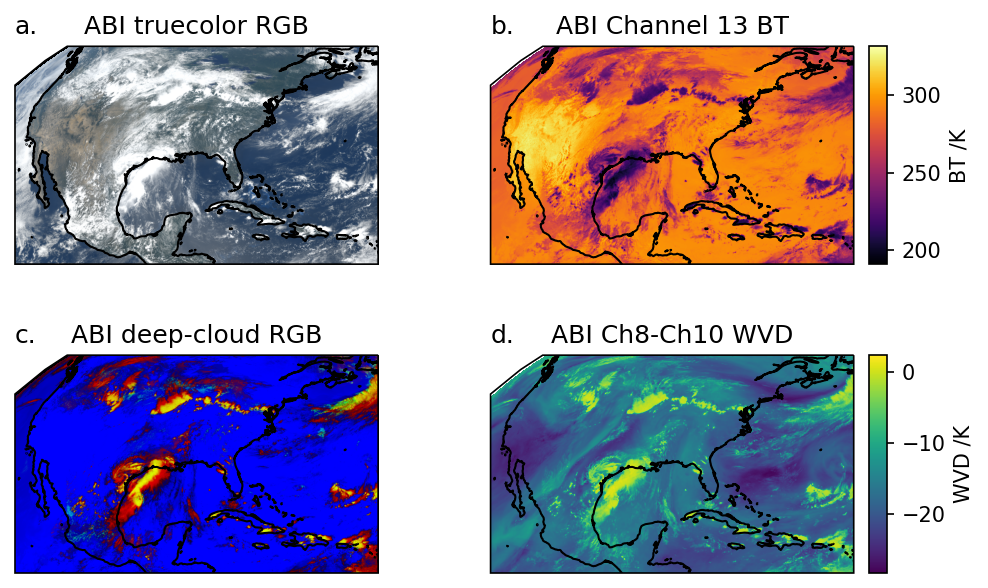

In [7]:
from utils.plotting import goes_figure

fig = goes_figure(goes_frame, dpi=150, figsize=(7.5,5))
ax1 = fig.subplot(221)
ax1.imshow(abi.get_abi_rgb(goes_frame))
ax1.coastlines()
ax1.set_title('a.', loc='left')
ax1.set_title('ABI truecolor RGB')

ax2 = fig.subplot(222)
img2 = ax2.imshow(goes_frame.CMI_C13, cmap='inferno')
ax2.coastlines()
cbar2 = ax2.colorbar(img2)
cbar2.set_label('BT /K')
ax2.set_title('b.', loc='left')
ax2.set_title('ABI Channel 13 BT')

ax3 = fig.subplot(223)
ax3.imshow(abi.get_abi_deep_cloud_rgb(goes_frame))
ax3.coastlines()
ax3.set_title('c.', loc='left')
ax3.set_title('ABI deep-cloud RGB')

ax4 = fig.subplot(224)
img4 = ax4.imshow(goes_frame.CMI_C08-goes_frame.CMI_C10, cmap='viridis')
ax4.coastlines()
cbar4 = ax4.colorbar(img4)
cbar4.set_label('WVD /K')
ax4.set_title('d.', loc='left')
ax4.set_title('ABI Ch8-Ch10 WVD')


In [8]:
# Load a stack of goes datasets using xarray. Select a region over Northern Florida. (full file size in 1500x2500 pixels)
goes_ds = xr.open_mfdataset(abi_files.values(), concat_dim='t', combine='nested').isel({'x':slice(1300,1550), 'y':slice(650,900)})

In [9]:
goes_ds

<xarray.Dataset>
Dimensions:                                 (band: 1, number_of_image_bounds: 2, number_of_time_bounds: 2, t: 48, x: 250, y: 250)
Coordinates:
  * t                                       (t) datetime64[ns] 2018-06-19T17:...
  * y                                       (y) float32 0.091812 ... 0.077868
  * x                                       (x) float32 -0.028531998 ... -0.0...
    y_image                                 float32 0.08624
    x_image                                 float32 -0.03136
    band_wavelength_C01                     (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    band_wavelength_C02                     (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    band_wavelength_C03                     (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    band_wavelength_C04                     (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    band_wavelength_C05                     (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    band_wavelength_C06                     (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    band_wavelength_C07                     (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    band_wavelength_C08                     (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    band_wavelength_C09                     (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    band_wavelength_C10                     (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    band_wavelength_C11                     (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    band_wavelength_C12                     (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    band_wavelength_C13                     (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    band_wavelength_C14                     (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    band_wavelength_C15                     (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    band_wavelength_C16                     (band) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C01                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C02                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C03                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C04                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C05                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C06                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C07                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C08                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C09                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C10                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C11                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C12                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C13                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C14                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C15                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
    band_id_C16                             (band) int8 dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: band, number_of_image_bounds, number_of_time_bounds
Data variables:
    CMI_C01                                 (t, y, x) float32 dask.array<chunksize=(1, 250, 250), meta=np.ndarray>
    DQF_C01     

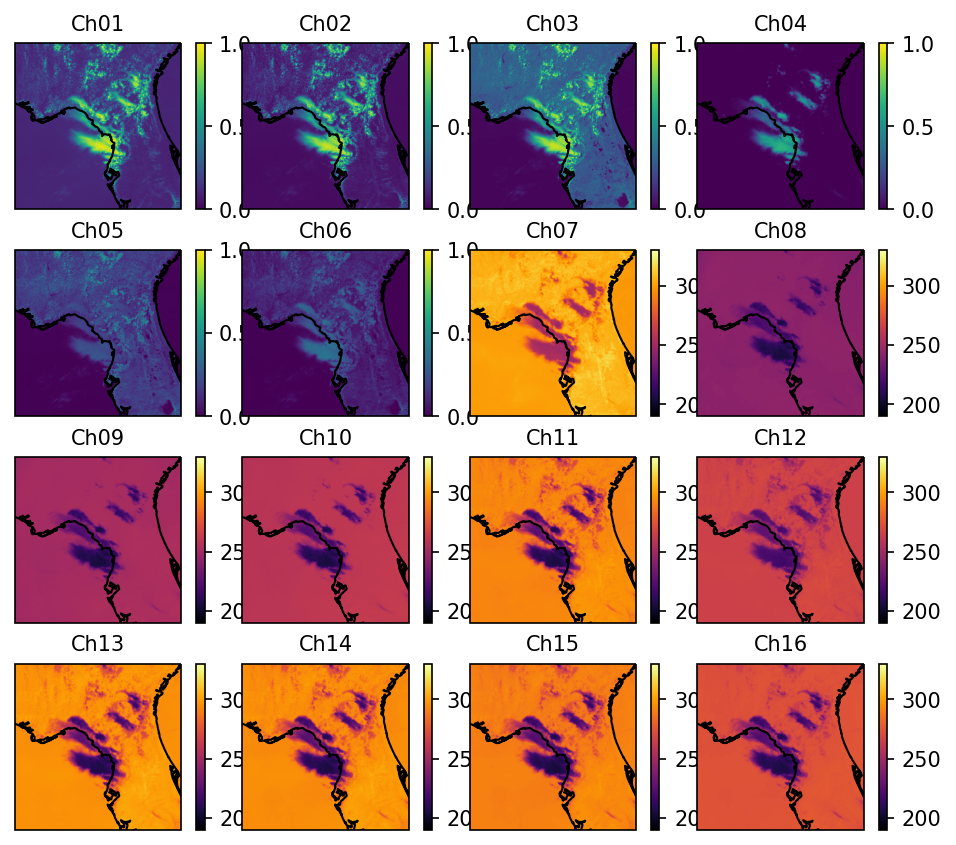

In [10]:
# Now plot all 16 channels
i = 24

fig = goes_figure(goes_ds, dpi=150, figsize=(7.5,7))

for a in range(1,17):
    ax = fig.subplot(4,4,a)
    ax.coastlines()
    if a >=7:
        cmap='inferno'
        vmax=330
        vmin=190
    else:
        cmap='viridis'
        vmax=1
        vmin=0
    img = ax.imshow(goes_ds['CMI_C%02d'%a][i], cmap=cmap, vmin=vmin, vmax=vmax)
    cbar = ax.colorbar(img)
    title = ax.set_title('Ch%02d'%a, fontsize=10)

In [11]:
# Test glm parallax

In [12]:
glm_files = sorted(io.find_glm_files(dates[2], satellite=16,
                                        save_dir=goes_data_path,
                                        replicate_path=True, check_download=True,
                                        n_attempts=1, download_missing=True))
glm_files = {io.get_goes_date(i):i for i in glm_files}

In [13]:
glm_files

{datetime.datetime(2018, 6, 19, 19, 0): './data/GOES16/GLM-L2-LCFA/2018/170/19/OR_GLM-L2-LCFA_G16_s20181701900000_e20181701900200_c20181701900225.nc',
 datetime.datetime(2018, 6, 19, 19, 0, 20): './data/GOES16/GLM-L2-LCFA/2018/170/19/OR_GLM-L2-LCFA_G16_s20181701900200_e20181701900400_c20181701900426.nc',
 datetime.datetime(2018, 6, 19, 19, 0, 40): './data/GOES16/GLM-L2-LCFA/2018/170/19/OR_GLM-L2-LCFA_G16_s20181701900400_e20181701901000_c20181701901023.nc',
 datetime.datetime(2018, 6, 19, 19, 1): './data/GOES16/GLM-L2-LCFA/2018/170/19/OR_GLM-L2-LCFA_G16_s20181701901000_e20181701901200_c20181701901226.nc',
 datetime.datetime(2018, 6, 19, 19, 1, 20): './data/GOES16/GLM-L2-LCFA/2018/170/19/OR_GLM-L2-LCFA_G16_s20181701901200_e20181701901400_c20181701901425.nc',
 datetime.datetime(2018, 6, 19, 19, 1, 40): './data/GOES16/GLM-L2-LCFA/2018/170/19/OR_GLM-L2-LCFA_G16_s20181701901400_e20181701902000_c20181701902027.nc',
 datetime.datetime(2018, 6, 19, 19, 2): './data/GOES16/GLM-L2-LCFA/2018/170/19

In [14]:
abi_dates[24]

datetime.datetime(2018, 6, 19, 19, 2, 24)

In [96]:
reload(glm)

<module 'utils.glm' from '/Users/jonesw/python/example_notebooks/utils/glm.py'>

In [97]:
glm_grid_corrected = glm.regrid_glm(glm_files, goes_ds.isel({'t':slice(24,36)}), corrected=True)

In [98]:
glm_grid_uncorrected = glm.regrid_glm(glm_files, goes_ds.isel({'t':slice(24,36)}), corrected=False)

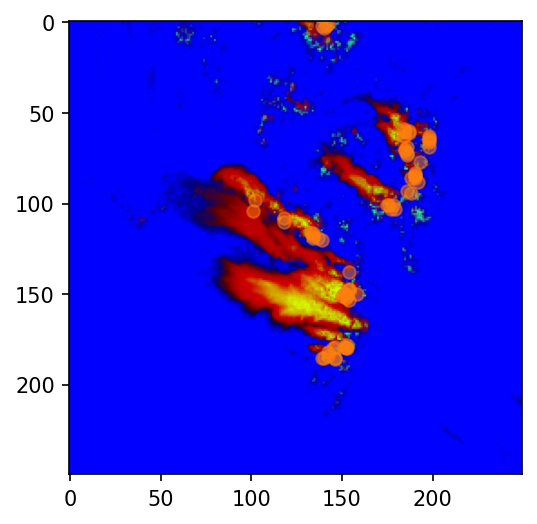

In [101]:
plt.figure(dpi=150)
plt.imshow(abi.get_abi_deep_cloud_rgb(goes_ds.isel({'t':24})))
plt.scatter(*np.where(glm_grid_uncorrected[0]>0)[::-1], alpha=0.5, c='C01')
# plt.scatter(*np.where(glm_grid_corrected>0)[::-1], alpha=0.4)

In [21]:
nexrad_data_path = './data/nexrad_l2'
print('Finding NEXRAD data')
nexrad_sites = nexrad.filter_nexrad_sites(goes_ds,extend=0.0005)
print("Number of sites in bound: %d" % len(nexrad_sites))
nexrad_files = sum([io.find_nexrad_files(dates[2], site, save_dir=nexrad_data_path, download_missing=True)
                    for site in nexrad_sites], [])

Finding NEXRAD data
Number of sites in bound: 8


In [22]:
nexrad_files

['./data/nexrad_l2/2018/06/19/KVAX/NWS_NEXRAD_NXL2DPBL_KVAX_20180619190000_20180619195959.tar',
 './data/nexrad_l2/2018/06/19/KJAX/NWS_NEXRAD_NXL2DPBL_KJAX_20180619190000_20180619195959.tar',
 './data/nexrad_l2/2018/06/19/KMLB/NWS_NEXRAD_NXL2DPBL_KMLB_20180619190000_20180619195959.tar',
 './data/nexrad_l2/2018/06/19/KTLH/NWS_NEXRAD_NXL2DPBL_KTLH_20180619190000_20180619195959.tar',
 './data/nexrad_l2/2018/06/19/KTBW/NWS_NEXRAD_NXL2DPBL_KTBW_20180619190000_20180619195959.tar',
 './data/nexrad_l2/2018/06/19/KEOX/NWS_NEXRAD_NXL2DPBL_KEOX_20180619190000_20180619195959.tar',
 './data/nexrad_l2/2018/06/19/KMXX/NWS_NEXRAD_NXL2DPBL_KMXX_20180619190000_20180619195959.tar']

In [87]:
from importlib import reload; from utils import dataset; reload(dataset); reload(nexrad)

<module 'utils.nexrad' from '/Users/jonesw/python/example_notebooks/utils/nexrad.py'>

In [59]:
set(goes_ds.coords.keys()).intersection(set(goes_ds.dims))

{'t', 'x', 'y'}

In [64]:
tuple([goes_ds.coords[k].size for k in goes_ds.coords if k in set(goes_ds.coords.keys()).intersection(set(goes_ds.dims))])

(48, 250, 250)

In [67]:
def get_ds_shape(ds):
    shape = tuple([ds.coords[k].size for k in ds.coords if k in set(ds.coords.keys()).intersection(set(ds.dims))])
    return shape

In [68]:
get_ds_shape(goes_ds)

(48, 250, 250)

In [80]:
[parse_date(t.item()) for t in goes_ds.t.astype('datetime64[s]').astype(str)]

[datetime.datetime(2018, 6, 19, 17, 3, 43),
 datetime.datetime(2018, 6, 19, 17, 8, 43),
 datetime.datetime(2018, 6, 19, 17, 13, 43),
 datetime.datetime(2018, 6, 19, 17, 18, 43),
 datetime.datetime(2018, 6, 19, 17, 23, 43),
 datetime.datetime(2018, 6, 19, 17, 28, 43),
 datetime.datetime(2018, 6, 19, 17, 33, 43),
 datetime.datetime(2018, 6, 19, 17, 38, 43),
 datetime.datetime(2018, 6, 19, 17, 43, 43),
 datetime.datetime(2018, 6, 19, 17, 48, 43),
 datetime.datetime(2018, 6, 19, 17, 53, 43),
 datetime.datetime(2018, 6, 19, 17, 58, 43),
 datetime.datetime(2018, 6, 19, 18, 3, 43),
 datetime.datetime(2018, 6, 19, 18, 8, 43),
 datetime.datetime(2018, 6, 19, 18, 13, 43),
 datetime.datetime(2018, 6, 19, 18, 18, 43),
 datetime.datetime(2018, 6, 19, 18, 23, 43),
 datetime.datetime(2018, 6, 19, 18, 28, 43),
 datetime.datetime(2018, 6, 19, 18, 33, 43),
 datetime.datetime(2018, 6, 19, 18, 38, 43),
 datetime.datetime(2018, 6, 19, 18, 43, 43),
 datetime.datetime(2018, 6, 19, 18, 48, 43),
 datetime.date

In [47]:
ref_total = np.zeros(goes_ds.CMI_C13[24:25].shape)
ref_counts_raw = np.zeros(goes_ds.CMI_C13[24:25].shape)
ref_counts_masked = np.zeros(goes_ds.CMI_C13[24:25].shape)

for nf in nexrad_files:
    print(datetime.now(), nf)
    try:
        raw_count, stack_count, stack_mean = nexrad.get_site_grids(nf, goes_ds.isel({'t':slice(24,25)}), abi_dates[24:25],
                                                                   min_alt=2500, max_alt=15000)
    except (ValueError, IndexError) as e:
        print('Error processing nexrad data')
        print(e)
    wh = np.isfinite(stack_mean*stack_count)
    ref_total[wh] += stack_mean[wh]*stack_count[wh]
    ref_counts_raw += raw_count
    ref_counts_masked += stack_count


2020-11-02 16:09:51.754393 ./data/nexrad_l2/2018/06/19/KVAX/NWS_NEXRAD_NXL2DPBL_KVAX_20180619190000_20180619195959.tar
2020-11-02 16:10:07.313416 ./data/nexrad_l2/2018/06/19/KJAX/NWS_NEXRAD_NXL2DPBL_KJAX_20180619190000_20180619195959.tar
2020-11-02 16:12:28.937781 ./data/nexrad_l2/2018/06/19/KMLB/NWS_NEXRAD_NXL2DPBL_KMLB_20180619190000_20180619195959.tar
2020-11-02 16:13:32.978852 ./data/nexrad_l2/2018/06/19/KTLH/NWS_NEXRAD_NXL2DPBL_KTLH_20180619190000_20180619195959.tar
2020-11-02 16:15:51.425192 ./data/nexrad_l2/2018/06/19/KTBW/NWS_NEXRAD_NXL2DPBL_KTBW_20180619190000_20180619195959.tar
2020-11-02 16:18:02.608726 ./data/nexrad_l2/2018/06/19/KEOX/NWS_NEXRAD_NXL2DPBL_KEOX_20180619190000_20180619195959.tar
2020-11-02 16:20:03.421520 ./data/nexrad_l2/2018/06/19/KMXX/NWS_NEXRAD_NXL2DPBL_KMXX_20180619190000_20180619195959.tar


In [48]:
ref_grid = ref_total/ref_counts_masked
ref_mask = ref_counts_raw == 0
ref_grid[ref_mask] = np.nan
ref_grid[np.logical_and(~ref_mask, np.isnan(ref_grid))]=-33

/Users/jonesw/opt/anaconda3/envs/flow_dev2/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


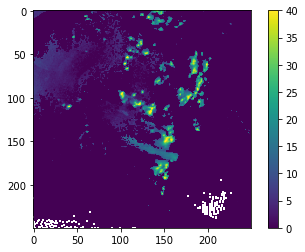

In [49]:
plt.imshow(ref_grid[0],vmin=0, vmax=40)
plt.colorbar()

2020-11-02 17:06:09.015684 ./data/nexrad_l2/2018/06/19/KVAX/NWS_NEXRAD_NXL2DPBL_KVAX_20180619190000_20180619195959.tar
2020-11-02 17:06:30.900214 ./data/nexrad_l2/2018/06/19/KJAX/NWS_NEXRAD_NXL2DPBL_KJAX_20180619190000_20180619195959.tar
2020-11-02 17:09:22.675945 ./data/nexrad_l2/2018/06/19/KMLB/NWS_NEXRAD_NXL2DPBL_KMLB_20180619190000_20180619195959.tar
2020-11-02 17:10:50.336327 ./data/nexrad_l2/2018/06/19/KTLH/NWS_NEXRAD_NXL2DPBL_KTLH_20180619190000_20180619195959.tar
2020-11-02 17:14:07.007727 ./data/nexrad_l2/2018/06/19/KTBW/NWS_NEXRAD_NXL2DPBL_KTBW_20180619190000_20180619195959.tar
2020-11-02 17:17:05.959271 ./data/nexrad_l2/2018/06/19/KEOX/NWS_NEXRAD_NXL2DPBL_KEOX_20180619190000_20180619195959.tar
2020-11-02 17:20:35.409567 ./data/nexrad_l2/2018/06/19/KMXX/NWS_NEXRAD_NXL2DPBL_KMXX_20180619190000_20180619195959.tar


/Users/jonesw/python/example_notebooks/utils/nexrad.py:113: RuntimeWarning: invalid value encountered in true_divide
  ref_mask = ref_counts_raw == 0


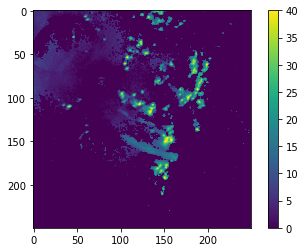

In [88]:
ref_grid, ref_mask = nexrad.regrid_nexrad(nexrad_files, goes_ds.isel({'t':slice(24,36)}), 
                                          min_alt=2500, max_alt=15000)
plt.imshow(ref_grid[0],vmin=0, vmax=40)
plt.colorbar()

Text(0.5, 1.0, 'Nexrad Reflectivity')

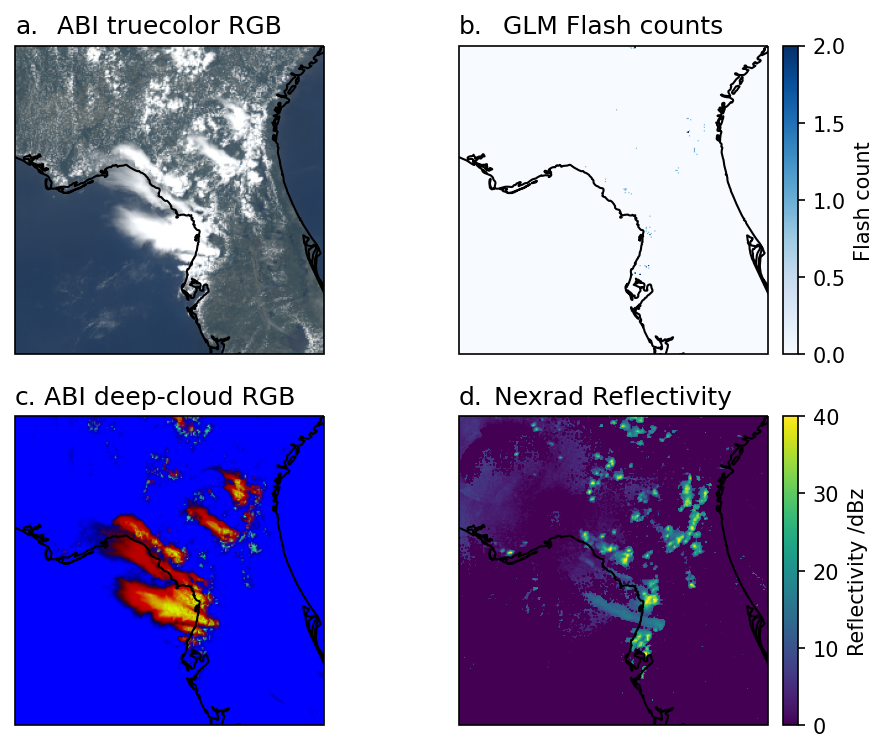

In [89]:
from utils.plotting import goes_figure

fig = goes_figure(goes_ds, dpi=150, figsize=(7,6))
ax1 = fig.subplot(221)
ax1.imshow(abi.get_abi_rgb(goes_ds.isel({'t':24})))
ax1.coastlines()
ax1.set_title('a.', loc='left')
ax1.set_title('ABI truecolor RGB')

ax2 = fig.subplot(222)
img2 = ax2.imshow(glm_grid_uncorrected, cmap='Blues', vmin=0, vmax=2)
ax2.coastlines()
cbar2 = ax2.colorbar(img2)
cbar2.set_label('Flash count')
ax2.set_title('b.', loc='left')
ax2.set_title('GLM Flash counts')

ax3 = fig.subplot(223)
ax3.imshow(abi.get_abi_deep_cloud_rgb(goes_ds.isel({'t':24})))
ax3.coastlines()
ax3.set_title('c.', loc='left')
ax3.set_title('ABI deep-cloud RGB')

ax4 = fig.subplot(224)
img4 = ax4.imshow(ref_grid[0],vmin=0, vmax=40)
ax4.coastlines()
cbar4 = ax4.colorbar(img4)
cbar4.set_label('Reflectivity /dBz')
ax4.set_title('d.', loc='left')
ax4.set_title('Nexrad Reflectivity')


In [19]:
# Test preprocessed gridded radar/glm file
# Note: these files have been produced using ./scripts/process_nexrad.py
# regrid_files = ['./data/regrid/regrid_20180619_160000.nc', 
#                 './data/regrid/regrid_20180619_170000.nc', 
#                 './data/regrid/regrid_20180619_180000.nc', 
#                 './data/regrid/regrid_20180619_190000.nc']
regrid_files = ['./data/regrid/old/regrid_%s.nc' % (date.strftime('%Y%m%d_%H0000')) for date in dates]
print(regrid_files)
grid_ds = xr.open_mfdataset(regrid_files, concat_dim='t', combine='nested')

['./data/regrid/old/regrid_20180619_170000.nc', './data/regrid/old/regrid_20180619_180000.nc', './data/regrid/old/regrid_20180619_190000.nc', './data/regrid/old/regrid_20180619_200000.nc']


In [20]:
xr.open_dataset(regrid_files[0])

<xarray.Dataset>
Dimensions:     (t: 12, x: 250, y: 250)
Coordinates:
    y_image     float32 ...
    x_image     float32 ...
  * y           (y) float32 0.091812 0.091756 0.0917 ... 0.077924006 0.077868
  * x           (x) float32 -0.028531998 -0.028476 ... -0.014643997 -0.014587998
  * t           (t) datetime64[ns] 2018-06-19T17:03:43.273992960 ... 2018-06-...
Data variables:
    glm_freq    (t, y, x) float64 ...
    radar_ref   (t, y, x) float64 ...
    radar_mask  (t, y, x) bool ...

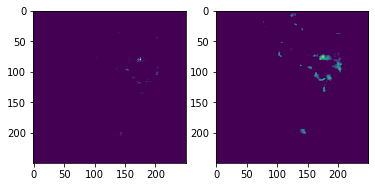

In [21]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(grid_ds.glm_freq[-1], vmin=0, vmax=5)
ax[1].imshow(ma.array(grid_ds.radar_ref[-1], mask=~grid_ds.radar_mask[-1]), vmin=0, vmax=40)

In [22]:
%%capture
fig, ax = plt.subplots(2,2,dpi=150, figsize=(7,6))

img_shape=grid_ds.glm_freq[0].shape
img00 = ax[0,0].imshow(np.zeros((*img_shape,3)))
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])
img01 = ax[0,1].imshow(np.zeros(img_shape), vmin=180, vmax=320, cmap='inferno')
cbar01 = plt.colorbar(img01, ax=ax[0,1], label="Brightness temperature /K")
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
img10 = ax[1,0].imshow(np.zeros(img_shape), vmin=0, vmax=5)
cbar10 = plt.colorbar(img10, ax=ax[1,0], label="Flash frequency")
ax[1,0].set_xticks([])
ax[1,0].set_yticks([])
img11 = ax[1,1].imshow(np.zeros(img_shape), vmin=0, vmax=40)
cbar11 = plt.colorbar(img11, ax=ax[1,1], label="Radar reflectivity /dBz")
ax[1,1].set_xticks([])
ax[1,1].set_yticks([])
t00 = ax[0,0].set_title('GOES-16 ABI RGB', loc='left', size=8)
t01 = ax[0,1].set_title('GOES-16 ABI C13', loc='left', size=8)
t10 = ax[1,0].set_title('GOES-16 GLM Flashes', loc='left', size=8)
t11 = ax[1,1].set_title('NEXRAD reflectivity', loc='left', size=8)

# init function: returns the plotting handles that will be modified
def init():
    img00.set_data(np.zeros((*img_shape,3)))
    img01.set_data(np.zeros(img_shape))
    img10.set_data(np.zeros(img_shape))
    img11.set_data(np.zeros(img_shape))
    return img00, img01, img10, img11

# animation function: modifies the data of the plot handles according to a frame index
def animate(i):
    rgbi = abi.get_abi_rgb(goes_ds.CMI_C01[i], goes_ds.CMI_C02[i], goes_ds.CMI_C03[i])
    img00.set_data(rgbi)
    img01.set_data(goes_ds.CMI_C13[i])
    img10.set_data(grid_ds.glm_freq[i])
    img11.set_data(ma.array(grid_ds.radar_ref[i], mask=~grid_ds.radar_mask[i]))
    return img00, img01, img10, img11

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=96, 
                               interval=100, repeat_delay=1000, blit=True)


In [24]:
# Embed using ipython
from IPython.display import HTML, Image, display
HTML(anim.to_html5_video())

In [36]:
nexrad_sites = ['TJUA','KCBW','KGYX','KCXX','KBOX','KENX','KBGM','KBUF','KTYX','KOKX','KDOX','KDIX','KPBZ','KCCX','KRLX','KAKQ','KFCX','KLWX','KMHX','KRAX','KLTX','KCLX','KCAE','KGSP','KFFC','KVAX','KJGX','KEVX','KJAX','KBYX','KMLB','KAMX','KTLH','KTBW','KBMX','KEOX','KHTX','KMXX','KMOB','KDGX','KGWX','KMRX','KNQA','KOHX','KHPX','KJKL','KLVX','KPAH','KILN','KCLE','KDTX','KAPX','KGRR','KMQT','KVWX','KIND','KIWX','KLOT','KILX','KGRB','KARX','KMKX','KDLH','KMPX','KDVN','KDMX','KEAX','KSGF','KLSX','KSRX','KLZK','KPOE','KLCH','KLIX','KSHV','KAMA','KEWX','KBRO','KCRP','KFWS','KDYX','KEPZ','KGRK','KHGX','KDFX','KLBB','KMAF','KSJT','KFDR','KTLX','KINX','KVNX','KDDC','KGLD','KTWX','KICT','KUEX','KLNX','KOAX','KABR','KUDX','KFSD','KBIS','KMVX','KMBX','KBLX','KGGW','KTFX','KMSX','KCYS','KRIW','KFTG','KGJX','KPUX','KABX','KFDX','KHDX','KFSX','KIWA','KEMX','KYUX','KICX','KMTX','KCBX','KSFX','KLRX','KESX','KRGX','KBBX','KEYX','KBHX','KVTX','KDAX','KNKX','KMUX','KHNX','KSOX','KVBX','PHKI','PHKM','PHMO','PHWA','KMAX','KPDT','KRTX','KLGX','KATX','KOTX','PABC','PAPD','PAHG','PAKC','PAIH','PAEC','PACG','PGUA','LPLA','RKJK','RKSG','RODN']
raw_latlons = ['18.1155998°N 66.0780644°W','46.0391944°N 67.8066033°W','43.8913555°N 70.2565545°W','44.5109941°N 73.166424°W','41.9558919°N 71.1369681°W','42.5865699°N 74.0639877°W','42.1997045°N 75.9847015°W','42.9488055°N 78.7369108°W','43.7556319°N 75.6799918°W','40.8655093°N 72.8638548°W','38.8257651°N 75.4400763°W','39.9470885°N 74.4108027°W','40.5316842°N 80.2179515°W','40.9228521°N 78.0038738°W','38.3110763°N 81.7229015°W','36.9840475°N 77.007342°W','37.0242098°N 80.2736664°W','38.9753957°N 77.4778444°W','34.7759313°N 76.8762571°W','35.6654967°N 78.4897855°W','33.9891631°N 78.4291059°W','32.6554866°N 81.0423124°W','33.9487579°N 81.1184281°W','34.8833435°N 82.2200757°W','33.3635771°N 84.565866°W','30.8903853°N 83.0019021°W','32.6755239°N 83.3508575°W','30.5649908°N 85.921559°W','30.4846878°N 81.7018917°W','24.5974996°N 81.7032355°W','28.1131808°N 80.6540988°W','25.6111275°N 80.412747°W','30.397568°N 84.3289116°W','27.7054701°N 82.40179°W','33.1722806°N 86.7698425°W','31.4605622°N 85.4592401°W','34.930508°N 86.0837388°W','32.5366608°N 85.7897848°W','30.6795378°N 88.2397816°W','32.2797358°N 89.9846309°W','33.8967796°N 88.3293915°W','36.168538°N 83.401779°W','35.3447802°N 89.8734534°W','36.2472389°N 86.5625185°W','36.7368894°N 87.2854328°W','37.590762°N 83.313039°W','37.9753058°N 85.9438455°W','37.0683618°N 88.7720257°W','39.42028°N 83.82167°W','41.4131875°N 81.8597451°W','42.6999677°N 83.471809°W','44.907106°N 84.719817°W','42.893872°N 85.5449206°W','46.5311443°N 87.5487131°W','38.2603901°N 87.7246553°W','39.7074962°N 86.2803675°W','41.3586356°N 85.7000488°W','41.6044264°N 88.084361°W','40.150544°N 89.336842°W','44.4984644°N 88.111124°W','43.822766°N 91.1915767°W','42.9678286°N 88.5506335°W','46.8368569°N 92.2097433°W','44.8488029°N 93.5654873°W','41.611556°N 90.5809987°W','41.7311788°N 93.7229235°W','38.8102231°N 94.2644924°W','37.235223°N 93.4006011°W','38.6986863°N 90.682877°W','35.2904423°N 94.3619075°W','34.8365261°N 92.2621697°W','31.1556923°N 92.9762596°W','30.125382°N 93.2161188°W','30.3367133°N 89.8256618°W','32.450813°N 93.8412774°W','35.2334827°N 101.7092478°W','29.7039802°N 98.028506°W','25.9159979°N 97.4189526°W','27.7840203°N 97.511234°W','32.5730186°N 97.3031911°W','32.5386009°N 99.2542863°W','31.8731115°N 106.697942°W','30.7217637°N 97.3829627°W','29.4718835°N 95.0788593°W','29.2730823°N 100.2802312°W','33.6541242°N 101.814149°W','31.9433953°N 102.1894383°W','31.3712815°N 100.4925227°W','34.3620014°N 98.9766884°W','35.3333873°N 97.2778255°W','36.1750977°N 95.5642802°W','36.7406166°N 98.1279409°W','37.7608043°N 99.9688053°W','39.3667737°N 101.7004341°W','38.996998°N 96.232618°W','37.6545724°N 97.4431461°W','40.320966°N 98.4418559°W','41.9579623°N 100.5759609°W','41.3202803°N 96.3667971°W','45.4558185°N 98.4132046°W','44.1248485°N 102.8298157°W','43.5877467°N 96.7293674°W','46.7709329°N 100.7605532°W','47.5279417°N 97.3256654°W','48.39303°N 100.8644378°W','45.8537632°N 108.6068165°W','48.2064536°N 106.6252971°W','47.4595023°N 111.3855368°W','47.0412971°N 113.9864373°W','41.1519308°N 104.8060325°W','43.0660779°N 108.4773731°W','39.7866156°N 104.5458126°W','39.0619824°N 108.2137012°W','38.4595034°N 104.1816223°W','35.1497579°N 106.8239576°W','34.6341569°N 103.6186427°W','33.0768844°N 106.1200923°W','34.574449°N 111.198367°W','33.289111°N 111.6700092°W','31.8937186°N 110.6304306°W','32.4953477°N 114.6567214°W','37.59083°N 112.86222°W','41.2627795°N 112.4480081°W','43.4902104°N 116.2360436°W','43.1055967°N 112.6860487°W','40.7396933°N 116.8025529°W','35.7012894°N 114.8918277°W','39.7541931°N 119.4620597°W','39.4956958°N 121.6316557°W','35.0979358°N 117.5608832°W','40.4986955°N 124.2918867°W','34.4116386°N 119.1795641°W','38.5011529°N 121.6778487°W','32.9189891°N 117.041814°W','37.155152°N 121.8984577°W','36.3142088°N 119.6320903°W','33.8176452°N 117.6359743°W','34.8383137°N 120.3977805°W','21.8938762°N 159.5524585°W','20.1254606°N 155.778054°W','21.1327531°N 157.1802807°W','19.0950155°N 155.5688846°W','42.0810766°N 122.7173334°W','45.6906118°N 118.8529301°W','45.7150308°N 122.9650542°W','47.116806°N 124.10625°W','48.1945614°N 122.4957508°W','47.6803744°N 117.6267797°W','60.791987°N 161.876539°W','65.0351238°N 147.5014222°W','60.6156335°N 151.2832296°W','58.6794558°N 156.6293335°W','59.46194°N 146.30111°W','64.5114973°N 165.2949071°W','56.85214°N 135.552417°W','13.455965°N 144.8111022°E','38.73028°N 27.32167°W','35.92417°N 126.62222°E','37.207652°N 127.285614°E','26.307796°N 127.903422°E']
nexrad_latlons = [[float(s[:-2]) if s[-1] in ['N', 'E'] else -float(s[:-2]) for s in ll.split(' ')] 
                  for ll in raw_latlons]

In [37]:
nexrad_lats, nexrad_lons = zip(*nexrad_latlons)

In [48]:
list(zip(*abi.get_abi_x_y(nexrad_lats, nexrad_lons, goes_ds)))

[(0.025953888929521093, 0.05442101116862236),
 (0.014598878721402125, 0.12038441420999571),
 (0.010062691200300488, 0.11654921347583502),
 (0.0038489455412392477, 0.11773753215962739),
 (0.008496789589464092, 0.11286495153311574),
 (0.002037545627210175, 0.1141205859515281),
 (-0.002158578462447825, 0.11337101617474067),
 (-0.008073330316765354, 0.11478757154626687),
 (-0.0014484981804311805, 0.11634300121793388),
 (0.004792657763133161, 0.11072517547613239),
 (-0.0010217709350908537, 0.10654290736416426),
 (0.0013430744962705458, 0.10887043669656081),
 (-0.011754875954601184, 0.11000322968409851),
 (-0.006730682331014296, 0.1108306108656957),
 (-0.015686360279503642, 0.10535883063647286),
 (-0.004795115081305235, 0.10258886521969528),
 (-0.01256806993209436, 0.10262578351260887),
 (-0.0057367261074320825, 0.10684401759023364),
 (-0.00462851338132708, 0.09766361755282071),
 (-0.00849524867217656, 0.09965516330204827),
 (-0.00854636587350172, 0.09584099010218407),
 (-0.01530020995233144

In [11]:
from utils.nexrad import get_nexrad_sitenames, get_nexrad_site_latlons, filter_nexrad_sites


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [51]:
dict(zip(get_nexrad_sitenames(), zip(*abi.get_abi_x_y(nexrad_lats, nexrad_lons, goes_ds))))

/Users/jonesw/opt/anaconda3/envs/flow_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'TJUA': (0.025953888929521093, 0.05442101116862236),
 'KCBW': (0.014598878721402125, 0.12038441420999571),
 'KGYX': (0.010062691200300488, 0.11654921347583502),
 'KCXX': (0.0038489455412392477, 0.11773753215962739),
 'KBOX': (0.008496789589464092, 0.11286495153311574),
 'KENX': (0.002037545627210175, 0.1141205859515281),
 'KBGM': (-0.002158578462447825, 0.11337101617474067),
 'KBUF': (-0.008073330316765354, 0.11478757154626687),
 'KTYX': (-0.0014484981804311805, 0.11634300121793388),
 'KOKX': (0.004792657763133161, 0.11072517547613239),
 'KDOX': (-0.0010217709350908537, 0.10654290736416426),
 'KDIX': (0.0013430744962705458, 0.10887043669656081),
 'KPBZ': (-0.011754875954601184, 0.11000322968409851),
 'KCCX': (-0.006730682331014296, 0.1108306108656957),
 'KRLX': (-0.015686360279503642, 0.10535883063647286),
 'KAKQ': (-0.004795115081305235, 0.10258886521969528),
 'KFCX': (-0.01256806993209436, 0.10262578351260887),
 'KLWX': (-0.0057367261074320825, 0.10684401759023364),
 'KMHX': (-0.004

In [91]:
def filter_nexrad_sites(goes_ds, extend=0.005):
    site_pairs = dict(zip(get_nexrad_sitenames(), zip(*abi.get_abi_x_y(*get_nexrad_site_latlons(), goes_ds))))
    x0 = goes_ds.x.data[0]-extend
    x1 = goes_ds.x.data[-1]+extend
    y0 = goes_ds.y.data[-1]-extend
    y1 = goes_ds.y.data[0]+extend
    def _in_bounds(x,y):
        return (x>x0 and x<x1 and y>y0 and y<y1)
    
    return [k for k in site_pairs if _in_bounds(*site_pairs[k])]
    
    

/Users/jonesw/opt/anaconda3/envs/flow_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
filter_nexrad_sites(goes_ds)

/Users/jonesw/opt/anaconda3/envs/flow_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['KCLX',
 'KCAE',
 'KFFC',
 'KVAX',
 'KJGX',
 'KEVX',
 'KJAX',
 'KMLB',
 'KAMX',
 'KTLH',
 'KTBW',
 'KBMX',
 'KEOX',
 'KMXX',
 'KGWX']

In [93]:
len(filter_nexrad_sites(goes_frame))

/Users/jonesw/opt/anaconda3/envs/flow_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


146

/Users/jonesw/opt/anaconda3/envs/flow_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


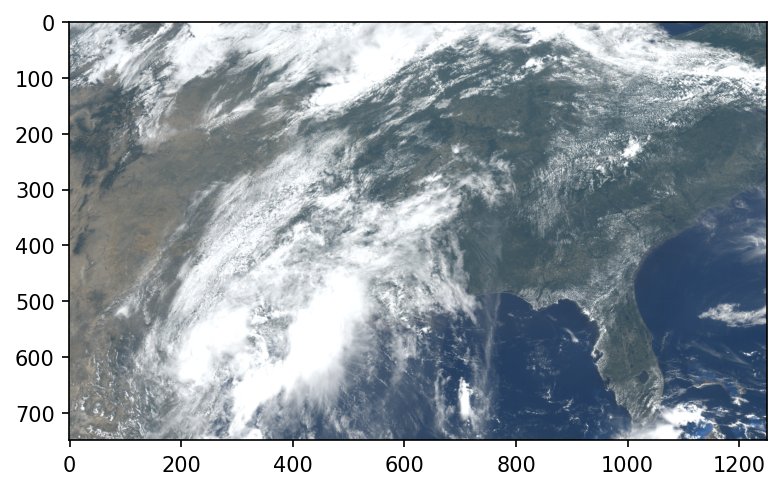

In [82]:
plt.figure(dpi=150)
crop_bounds= {'x':slice(500,1750), 'y':slice(250,1000)}
plt.imshow(abi.get_abi_rgb(goes_frame.CMI_C01.isel(crop_bounds), goes_frame.CMI_C02.isel(crop_bounds), goes_frame.CMI_C03.isel(crop_bounds)))
                                                   

In [94]:
len(filter_nexrad_sites(goes_frame.isel(crop_bounds)))

/Users/jonesw/opt/anaconda3/envs/flow_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


106

In [84]:
filter_nexrad_sites(goes_frame.isel(crop_bounds))

/Users/jonesw/opt/anaconda3/envs/flow_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['KBGM',
 'KBUF',
 'KTYX',
 'KDOX',
 'KDIX',
 'KPBZ',
 'KCCX',
 'KRLX',
 'KAKQ',
 'KFCX',
 'KLWX',
 'KMHX',
 'KRAX',
 'KLTX',
 'KCLX',
 'KCAE',
 'KGSP',
 'KFFC',
 'KVAX',
 'KJGX',
 'KEVX',
 'KJAX',
 'KBYX',
 'KMLB',
 'KAMX',
 'KTLH',
 'KTBW',
 'KBMX',
 'KEOX',
 'KHTX',
 'KMXX',
 'KMOB',
 'KDGX',
 'KGWX',
 'KMRX',
 'KNQA',
 'KOHX',
 'KHPX',
 'KJKL',
 'KLVX',
 'KPAH',
 'KILN',
 'KCLE',
 'KDTX',
 'KAPX',
 'KGRR',
 'KVWX',
 'KIND',
 'KIWX',
 'KLOT',
 'KILX',
 'KGRB',
 'KARX',
 'KMKX',
 'KMPX',
 'KDVN',
 'KDMX',
 'KEAX',
 'KSGF',
 'KLSX',
 'KSRX',
 'KLZK',
 'KPOE',
 'KLCH',
 'KLIX',
 'KSHV',
 'KAMA',
 'KEWX',
 'KBRO',
 'KCRP',
 'KFWS',
 'KDYX',
 'KEPZ',
 'KGRK',
 'KHGX',
 'KDFX',
 'KLBB',
 'KMAF',
 'KSJT',
 'KFDR',
 'KTLX',
 'KINX',
 'KVNX',
 'KDDC',
 'KGLD',
 'KTWX',
 'KICT',
 'KUEX',
 'KLNX',
 'KOAX',
 'KABR',
 'KUDX',
 'KFSD',
 'KBLX',
 'KMSX',
 'KCYS',
 'KRIW',
 'KFTG',
 'KGJX',
 'KPUX',
 'KABX',
 'KFDX',
 'KHDX',
 'KMTX',
 'KCBX',
 'KSFX']

In [85]:
site_pairs = dict(zip(get_nexrad_sitenames(), zip(*abi.get_abi_x_y(nexrad_lats, nexrad_lons, goes_ds))))

/Users/jonesw/opt/anaconda3/envs/flow_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
points = [site_pairs[k] for k in filter_nexrad_sites(goes_frame.isel(crop_bounds))]

/Users/jonesw/opt/anaconda3/envs/flow_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/jonesw/opt/anaconda3/envs/flow_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


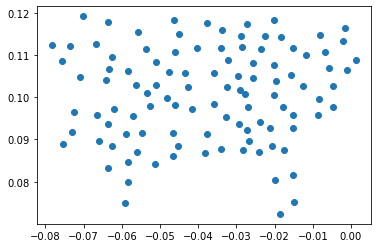

In [89]:
plt.scatter(*zip(*points))

In [90]:
len(['TJUA','KCBW','KGYX','KCXX','KBOX','KENX','KBGM','KBUF','KTYX','KOKX','KDOX','KDIX','KPBZ','KCCX','KRLX','KAKQ','KFCX','KLWX','KMHX','KRAX','KLTX','KCLX','KCAE','KGSP','KFFC','KVAX','KJGX','KEVX','KJAX','KBYX','KMLB','KAMX','KTLH','KTBW','KBMX','KEOX','KHTX','KMXX','KMOB','KDGX','KGWX','KMRX','KNQA','KOHX','KHPX','KJKL','KLVX','KPAH','KILN','KCLE','KDTX','KAPX','KGRR','KMQT','KVWX','KIND','KIWX','KLOT','KILX','KGRB','KARX','KMKX','KDLH','KMPX','KDVN','KDMX','KEAX','KSGF','KLSX','KSRX','KLZK','KPOE','KLCH','KLIX','KSHV','KAMA','KEWX','KBRO','KCRP','KFWS','KDYX','KEPZ','KGRK','KHGX','KDFX','KLBB','KMAF','KSJT','KFDR','KTLX','KINX','KVNX','KDDC','KGLD','KTWX','KICT','KUEX','KLNX','KOAX','KABR','KUDX','KFSD','KBIS','KMVX','KMBX','KBLX','KGGW','KTFX','KMSX','KCYS','KRIW','KFTG','KGJX','KPUX','KABX','KFDX','KHDX','KFSX','KIWA','KEMX','KYUX','KICX','KMTX','KCBX','KSFX','KLRX','KESX','KRGX','KBBX','KEYX','KBHX','KVTX','KDAX','KNKX','KMUX','KHNX','KSOX','KVBX','PHKI','PHKM','PHMO','PHWA','KMAX','KPDT','KRTX','KLGX','KATX','KOTX'])

/Users/jonesw/opt/anaconda3/envs/flow_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


148

/Users/jonesw/opt/anaconda3/envs/flow_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([], [])

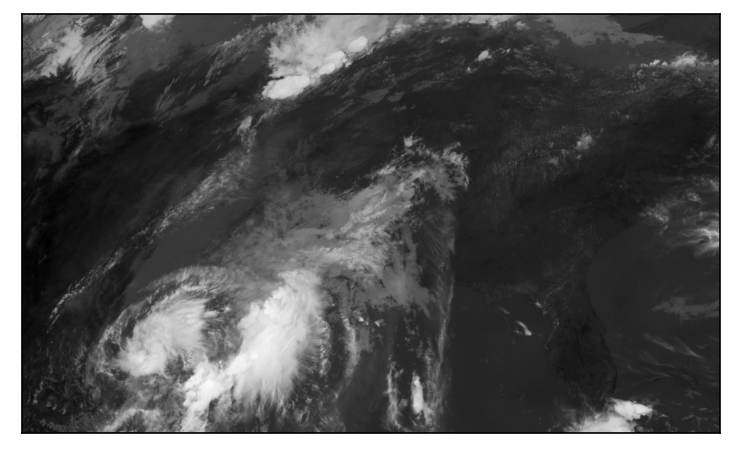

In [105]:
plt.figure(dpi=150)
plt.imshow(goes_frame.CMI_C13.isel(crop_bounds), cmap='binary')
plt.xticks([])
plt.yticks([])

In [9]:
regrid_ds = xr.open_dataset(regrid_files[-1])

In [10]:
regrid_ds

<xarray.Dataset>
Dimensions:   (t: 12, x: 1250, y: 750)
Coordinates:
    y_image   float32 ...
    x_image   float32 ...
  * y         (y) float32 0.11421201 0.11415601 0.1141 ... 0.07232401 0.07226801
  * x         (x) float32 -0.073332 -0.073276 ... -0.003444001 -0.0033880025
  * t         (t) datetime64[ns] 2018-06-19T23:03:43.446094976 ... 2018-06-19...
Data variables:
    glm_freq  (t, y, x) float64 ...

In [17]:
test_crop = {'x':slice(1550,1750), 'y':slice(800,1000)}
filter_nexrad_sites(goes_frame.isel(test_crop))

/Users/jonesw/opt/anaconda3/envs/flow_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['KJAX', 'KBYX', 'KMLB', 'KAMX']

In [18]:
xr.Dataset?

/Users/jonesw/opt/anaconda3/envs/flow_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
timedelta(minutes=2.5)

/Users/jonesw/opt/anaconda3/envs/flow_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


datetime.timedelta(seconds=150)

In [33]:
for i in range(5):
    try:
        assert i==5
    except Exception as e:
        err = e
    else:
        break
else:
    raise(err)

/Users/jonesw/opt/anaconda3/envs/flow_dev/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AssertionError: 